# Practice Session : Kalman Filter

In this session, we will code our own Kalman filter and try to study and apply it on simulated data. The first part is dedicated to code a Linear Gaussian Model simulator while the Second Part is about coding the Kalman Filter.

Instructions:
- Can be send in pairs or alone
- You can either complete the notebook by your own and send it under the name `Kalman_Practice-Session [NAMES].ipynb` where `[NAMES]` stands for your family name(s) or  `pdf` is fine.

## 1 - Linear Gaussian Model (LGM) Simulation

Let's consider at first the following Linear Gaussian Model (LGM) :

$$
\begin{cases}
X_0 \sim \mathcal{N}(m_0,P_0) \\
X_{k+1} = \Phi X_k + \epsilon_k\\
Y_{k+1} = \Psi X_{k+1} + \eta_{k+1} \\
\epsilon_k \sim \mathcal{N}(0,Q) \\
\eta_k \sim \mathcal{N}(0, R) 

\end{cases}\qquad \qquad \qquad (1)
$$

where the entries $X_0, (\epsilon_k)_{k\geq 0}, (\eta_k)_{k\geq 0}$ are independents.

The code hereafter generate $(X_{k+1}, Y_{k+1})$ knowning $X_k$.

In [721]:
import numpy as np
import matplotlib.pyplot as plt

def lingauss_step(x_current, Phi, Psi, Q, R):
    """
    Generate (X_{k+1}, Y_{k+1}) in the linear Gaussian model.
    Arguments:
    Phi, Psi: matrices defining the state dynamics and observation model (of sizes (p,p) and (q,p) respectively)
    Q, R: variances of the noise for the state equation and observation equation.
    x_current: vector of size p
    Returns:
    x: a column vector (dimensions (p,1))
    y: a column vector (dimensions (q,1))
    """
    dim_state = len(x_current)
    dim_obs = Psi.shape[0]
    x_current = np.reshape(x_current, (dim_state, 1))
    mean_state = np.dot(Phi, x_current)
    x = my_mvnormrnd(mean_state, Q, 1)
    x = np.reshape(x, (dim_state, 1))
    mean_obs = np.dot(Psi, x)
    y = my_mvnormrnd(mean_obs, R, 1)
    y = np.reshape(y, (dim_obs, 1))
    return x, y

def my_mvnormrnd(mean, cov, num_samples):
    """
    Generate samples from a multivariate normal distribution.
    mean: mean vector
    cov: covariance matrix
    num_samples: number of samples to generate
    Returns:
    samples: generated samples
    """
    samples = np.random.multivariate_normal(mean.flatten(), cov, num_samples).T
    return samples


# # Define parameters
# x_0 = np.array([[1], [2], [3]])
# Phi = 0.1 * np.array([[1, 1, 0], [0, 1, 1], [0, 0, 1]])
# Psi = np.array([[1, 0, 0], [0, 1, 1]])
# cholQ = np.array([[0.5, 0.5, 0.5], [0, 1, 1], [0, 0, 1]])
# Q = np.dot(cholQ, cholQ.T)
# cholR = 0.5 * np.array([[1, 1], [0, 2]])
# R = np.dot(cholR, cholR.T)

# # Perform one iteration in the model
# x, y = lingauss_step(x_0, A, B, Q, R)
# print("x:", x)
# print("y:", y)

The function `lingauss_simul` is made to generate sample $(X_k, Y_k)_{k=1}^{T}$ for a fixed $T$ and given $x_0$.

In [722]:
def lingauss_simul(x_0, T, Phi, Psi, Q, R):
    """
    Generate the process ((X_{k}, Y_{k}), k = 1:T) in the linear Gaussian model.
    Arguments:
    Phi, Psi: Matrices defining the state dynamics and observation model (of sizes resp. (p,p) and (q,p))
    Q, R: Variances of the noise for the state equation and observation equation.
    x_0: Initial state
    T: Number of iterations
    Returns:
    X: a matrix of size (T,p)
    Y: a matrix of size (T,q)
    """
    dim_state = Phi.shape[0]
    dim_obs = Psi.shape[0]
    X = np.zeros((T, dim_state))
    Y = np.zeros((T, dim_obs))
    x = x_0

    for i in range(T):
        x, y = lingauss_step(x, Phi, Psi, Q, R)
        X[i, :] = x.flatten()
        Y[i, :] = y.flatten()

    return X, Y

1. <span style="font-weight:bold;">Application :</span> We consider states $X_{k}=(X_{k,1}, X_{k,2}, X_{k,3})$ and observation $Y_{k} = (Y_{k,1}, Y_{k,2})$ with $i \in \{1,2,3\}$ and $j \in \{1,2\}$:

\begin{cases}
X_{k+1, i} = X_{k,i} + \epsilon_{k,i} & \text{with } \epsilon_{k,i} \sim \mathcal{N}(0,\tau^2) \\
Y_{k+1, j} = X_{k+1,j} + \eta_{k, j} & \text{with } \eta_{k,j} \sim \mathcal{N}(0,\sigma^2)
\end{cases} \qquad \qquad \qquad (2)
<span style="font-weight:bold; color:red;">Answer the following questions:</span><br>
    1.1 Write the model in Eq. (2) under the form of Eq. (1) by specifying the parameters $\Phi, \Psi, Q$ and $R$.<br>
    1.2 Complete the following code to show trajectory of $T=100$ observations at first. Comment.<br>
    1.3 Varying the paramters $\sigma,\tau $ and $T$ and comment the results.<br>

### Answers:
1.1 Write the model in Eq. (2) under the form of Eq. (1) by specifying the parameters $\Phi, \Psi, Q$ and $R$.<br>
The equation (2) can be rewritten as follow:

$$ \begin{cases}
X_0 \sim \mathcal{N}(m_0,P_0) \\
X_{k+1} = \Phi X_k + \epsilon_k\\
Y_{k+1} = \Psi X_{k+1} + \eta_{k+1} \\
\epsilon_k \sim \mathcal{N}(0,Q) \\
\eta_k \sim \mathcal{N}(0, R) 

\end{cases}\qquad \qquad \qquad  $$

With:

 $$\Phi = \begin{bmatrix}
   1 & 0 & 0 \\
   0 & 1 & 0 \\ 
   0 & 0 & 1
\end{bmatrix}, \Psi = \begin{bmatrix}
   1 & 0 & 0 \\
   0 & 1 & 0 \\ 
\end{bmatrix}, Q = \begin{bmatrix}
   \tau^{2} & 0 & 0 \\
   0 & \tau^{2} & 0 \\ 
   0 & 0 & \tau^{2}
\end{bmatrix}, R = \begin{bmatrix}
   \sigma^{2} & 0 \\
   0 & \sigma^{2} \\ 
\end{bmatrix} $$

1.2 Complete the following code to show trajectory of $T=100$ observations at first. Comment.<br>

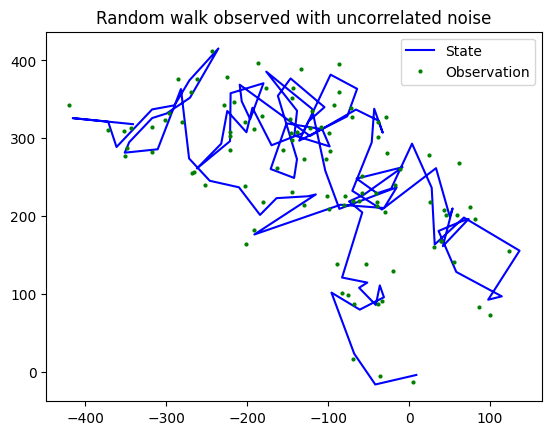

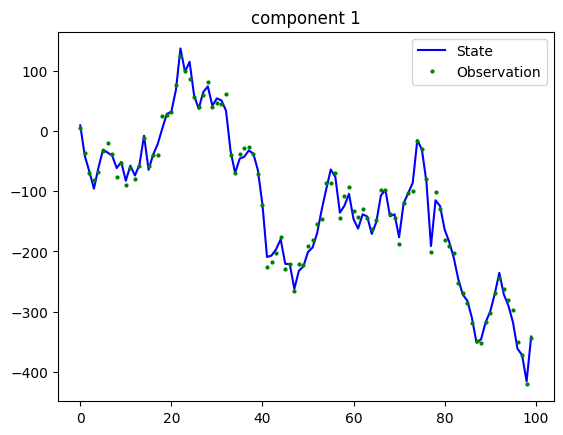

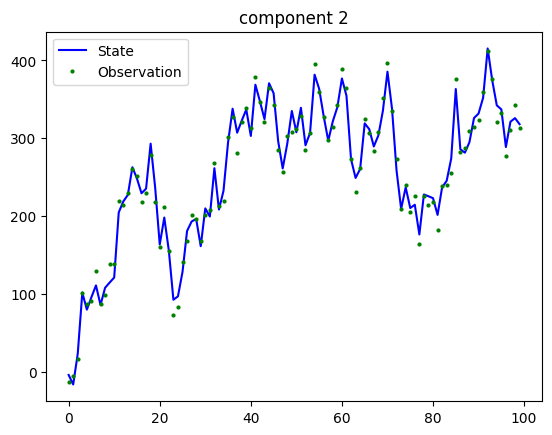

In [723]:
# A-1 parameters to modify
sigma = 10
tau = 40
x_0 = np.array([1, 2, -1])
T = 100

# A-2 structural parameters
Phi =  np.eye(3)  # Replace with appropriate matrix for state model
Psi =  np.array([[1,0,0],[0,1,0]]) # Replace with appropriate matrix for observation model
Q = tau**2 * np.eye(3) # Replace with appropriate covariance matrix for state equation
R = sigma**2 * np.eye(2) # Replace with appropriate covariance matrix for observation equation


# Perform simulation
X, Y = lingauss_simul(x_0, T, Phi, Psi, Q, R)

# Visualization
plt.figure(1)
plt.plot(X[:, 0], X[:, 1], 'b', label='State')
plt.plot(Y[:, 0], Y[:, 1], 'og', label='Observation', markersize=2)
plt.legend()
plt.title('Random walk observed with uncorrelated noise')
plt.show()

for i in range(2):
    plt.figure(i+2)
    plt.plot(X[:, i], 'b', label='State')
    plt.plot(Y[:, i], 'og', label='Observation', markersize=2)
    plt.title(f'component {i+1}')
    plt.legend()
    plt.show()



As we can see, we get a <strong>State</strong> and a <strong>Observation</strong> figure, notice how we are only plotting two comppnents ! Which makes sense, because $X$ is in $\R^{3}$ while $Y$ is in $\R^{2}$.
 
<strong>State</strong> follows a certain trajectory. <strong>Observation</strong> closely follows the state trajectory but with some fluctuations that were represented in equation (2) by the white noise $\eta$.

To see this closely, why not plot this in a 3D plane !

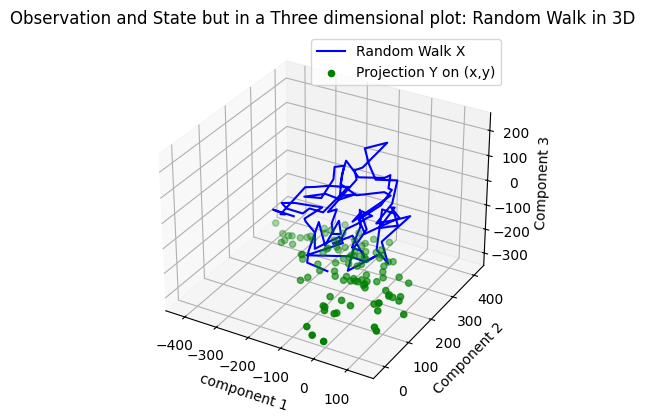

In [724]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(X[:, 0], X[:, 1], X[:, 2], color='blue',label='Random Walk X')
ax.scatter(Y[:,0],Y[:,1],np.min(X[:, 2]),color='green',label='Projection Y on (x,y)')
ax.set_xlabel("component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plt.legend()
plt.title("Observation and State but in a Three dimensional plot: Random Walk in 3D")
plt.show()

As we can see, $X$ is a 3D random variable following this trajectory plotted above. $Y$ is only the projection of $X$ on the subspace $(x,y)$ but with certain fluctuations. 

# 2 - Kalman Filter
Let's code what we saw before [here](https://matfontaine.github.io/KALMAN/#/11). The two first line are called *the predictions* whereas 3., 4. and 5. are called *the updates*.

2.1. Complete the function `kalman_predict`

In [725]:
def kalman_predict(m, P, Phi, Q):
    """
    Perform the prediction step in the Kalman filter.
    Calculates the predictive distribution [X_{k+1} | Y_{1:k}].
    Arguments:
    m, P: mean and variance of the current filtering distribution (vector and matrix of size p respectively)
    Phi: p*p matrix defining the state dynamics
    Q: variance of the noise (p*p matrix) for the state equation
    Returns:
    mpred: column vector of size p * 1: mean of the predictive distribution.
    Ppred: p*p matrix: covariance of the predictive distribution.
    """
    dim_state = m.shape[0]
    m = np.reshape(m, (dim_state, 1))
    # Predicted mean
    mpred = Phi @ m  # TO COMPLETE

    # Predicted covariance matrix
    Ppred = Phi @ P @ Phi.T  + Q # TO COMPLETE

    return mpred, Ppred

2.2. Complete the function `kalman_update`  ($S_t$ corresponds to $\Psi_t\Sigma_{t \mid t_-1} \Psi_t^\top + R$ in the given notation. It is called the *innovation covariance*)

In [726]:
def kalman_update(y, mpred, Ppred, Phi, Psi, Q, R):
    """
    Kalman update step:
    Arguments:
    mpred, Ppred: mean and variance of the current predictive distribution (returned by 'kalman_predict')
    y: vector of size q: new observation
    Phi, Psi: Matrices p*p and q*p defining the state dynamics and observation model
    Q, R: Variances of the noise for the state equation and observation equation of sizes p and q respectively
    Returns:
    mu, Pu: mean and covariance matrix of the filtering distribution after the update step
    """
    dim_state = Phi.shape[0]
    dim_obs = Psi.shape[0]

    # Measurement residual (can be used to update mu)
    
    residual = y - Psi @ mpred

    # Innovation covariance
    S = Psi @ Ppred @  Psi.T + R # TO COMPLETE

    # Kalman gain
    K = Ppred @ Psi.T @ np.linalg.inv(S) # TO COMPLETE

    # Updated mean
    mu = mpred + K @ residual # TO COMPLETE

    # Updated covariance matrix
    Pu = Ppred - K @ Psi @ Ppred #TO COMPLETE

    return mu, Pu

2.3. Finally, Write a function `kalman_filter` by completing the following model

In [727]:
def kalman_filter(Y, m_0, P_0, Phi, Psi, Q, R):
    """
    Kalman Filter:
    Sequentially filters observations Y to reconstruct the signal X.
    Arguments:
    Y: observations: a matrix T * q
    m_0: column vector of size p * 1: prior mean of the initial state
    P_0: p*p matrix: prior variance of the initial state
    Phi, Psi: matrices defining the state dynamics and observation model
    Q, R: variances of the noise for the state equation and observation equation.
    Returns:
    M: Matrix of size T * p: posterior means
    Parray: Array of dimension p*p*T of successive filtering covariance matrices
    """
    dim_state = Phi.shape[0]  # dimension of the states
    dim_obs = Psi.shape[0]  # dimension of the observations
    T = Y.shape[0]

    # Initialization
    P = P_0
    m = m_0
    M = np.zeros((T, dim_state))
    Parray = np.zeros((dim_state, dim_state, T))

    for k in range(T):
        # Prediction
        # TO COMPLETE
        mpred, Ppred = kalman_predict(m=m,P=P,Phi=Phi,Q=Q)

        # Update
        # TO COMPLETE

        mupdate, Pupdate = kalman_update(np.reshape(Y[k,:],(2,1)),mpred=mpred,Ppred=Ppred,Phi=Phi,Psi=Psi,Q=Q,R=R) # Reshaping Y because numpy is weird

        # Reassignment of the current state
        m = mupdate
        P = Pupdate

        # Storage
        M[k, :] = mupdate.flatten()
        Parray[:, :, k] = Pupdate

    return M, Parray

**Application:** : Try your function `kalman_filter` on  data $Y$ generated through data in Exercise 1. You can use the code hereafter and answer the following questions: <br><br>
2.4. What do the two yellow stripes represent ?<br>
2.5. Try several set of paramterers $\sigma, \tau, T$ and observes the consequences on the filtering. 

### <ins>Answers</ins>:
2.4. What do the two yellow stripes represent ?<br> 
The yellow stripes represent the confidence interval of the trajctory $X$, the famous $1.96$ comes to play, which corresponds to the quantile of the standard normal distribution for $1-\alpha / 2$, with $\alpha = 95\%$.

For the third component, the confidence interval acts weirdly! This is because we can not predict a third component of $Y$ since it is a 2D random variable!

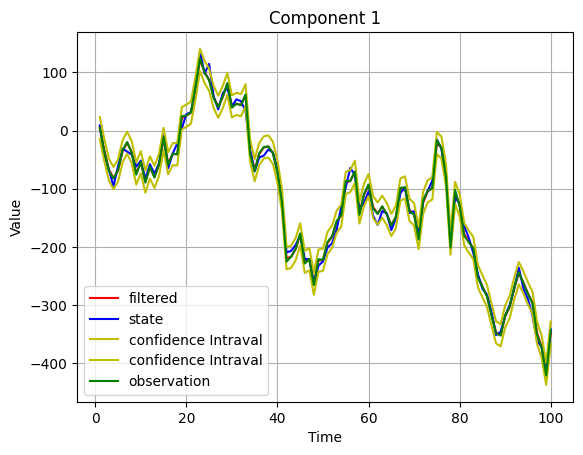

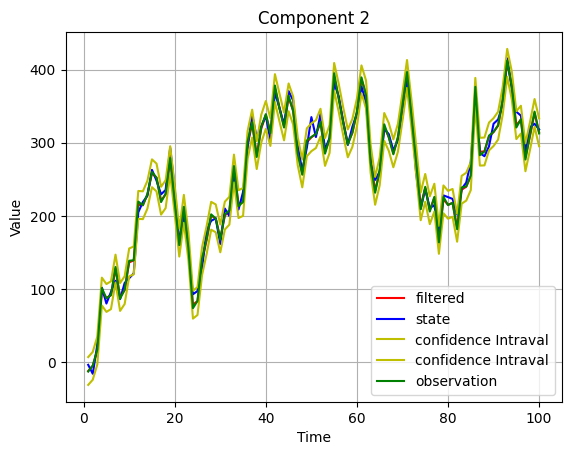

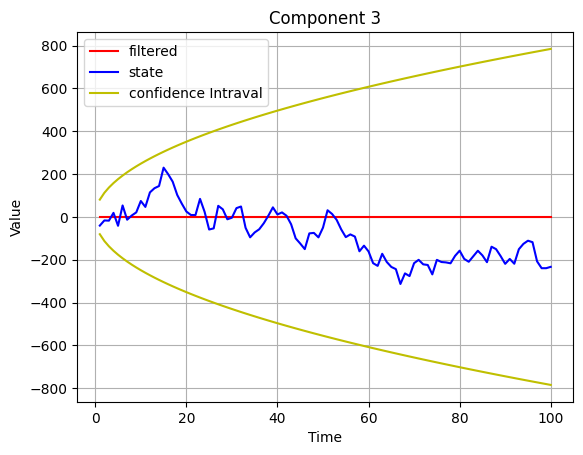

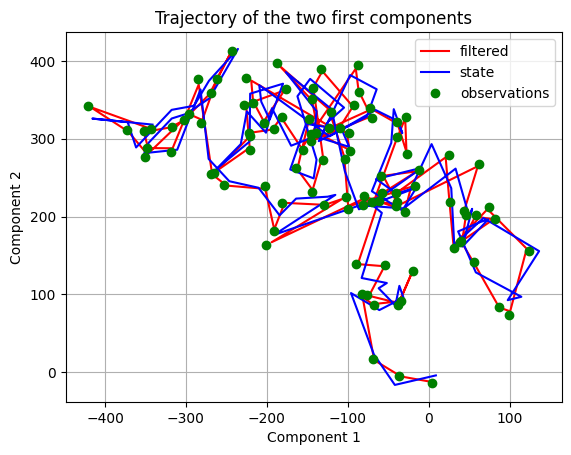

In [728]:
# Priors sur l'etat initial
m_0 = np.array([0, 0, 0])
P_0 = 100 * np.eye(3)

# Filtrage But this time we will change the values of tau, Sigma and Y
M, Parray = kalman_filter(Y, m_0, P_0, Phi, Psi, Q, R)

# Visualisation
plt.close('all')
for i in range(3):
    plt.figure(i+1)
    plt.plot(range(1, T+1), M[:, i], 'r', label='filtered')
    plt.plot(range(1, T+1), X[:, i], 'b', label='state')
    sd = np.sqrt(Parray[i, i, :])
    plt.plot(range(1, T+1), M[:, i] + 1.96 * sd, 'y')
    plt.plot(range(1, T+1), M[:, i] - 1.96 * sd, 'y')
    if i < 2:
        plt.plot(range(1, T+1), Y[:, i], 'g')
        plt.legend(['filtered', 'state','confidence Intraval','confidence Intraval', 'observation'])
    else:
        plt.legend(['filtered', 'state', 'confidence Intraval'])
    plt.title(f'Component {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

plt.figure(4)
plt.plot(M[:, 0], M[:, 1], 'r', label='filtered')
plt.plot(X[:, 0], X[:, 1], 'b', label='state')
plt.plot(Y[:, 0], Y[:, 1], 'og', label='observations')
plt.title('Trajectory of the two first components')
plt.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

2.5. Try several set of paramterers $\sigma, \tau, T$ and observes the consequences on the filtering.

To make things easier we will define a function that takes in parameters $T, \tau$ and $\sigma$ and plots the trajectories.

In [729]:
# Priors sur l'etat initial
m_0 = np.array([0, 0, 0])
P_0 = 100 * np.eye(3)

# Let us define a function that will make this question easier to plot

def plot_trajectory(T=100,tau=40,sigma=10):

    """
    X : The state
    Y : The Observation
    M : Mean of the random variable
    T: number of random variables
    tau : variance of the white noise epsilon
    sigma : Variance of the white noise eta
    """

    # We will change the values of tau, sigma and T here
    Q = tau**2 * np.eye(3) # Replace with appropriate covariance matrix for state equation
    R = sigma**2 * np.eye(2) # Replace with appropriate covariance matrix for observation equation
    T = T # size of the random variables
    # Perform simulation
    X, Y = lingauss_simul(x_0, T, Phi, Psi, Q, R)

    # Filtrage
    fig, ax = plt.subplots(2,3,figsize=(15,5)) 
    M, Parray = kalman_filter(Y, m_0, P_0, Phi, Psi, Q, R)

    fig.suptitle(f"Trajectories with T = {T}, $\sigma$ = {sigma} and $\\tau$ ={tau}")

    for i in range(3):
        ax[0,i].plot(range(1, T+1), M[:, i], 'r', label='filtered')
        ax[0,i].plot(range(1, T+1), X[:, i], 'b', label='state')
        sd = np.sqrt(Parray[i, i, :])
        ax[0,i].plot(range(1, T+1), M[:, i] + 1.96 * sd, 'y')
        ax[0,i].plot(range(1, T+1), M[:, i] - 1.96 * sd, 'y')
        if i < 2:
            ax[0,i].plot(range(1, T+1), Y[:, i], 'g')
            ax[0,i].legend(['filtered', 'state','confidence Intraval','confidence Intraval', 'observation'])
        else:
            ax[0,i].legend(['filtered', 'state', 'confidence Intraval'])
        ax[0,i].set_title(f'Component {i+1}')
        ax[0,i].set_xlabel('Time')
        ax[0,i].set_ylabel('Value')
        ax[0,i].grid(True)

    ax[1,1].plot(M[:, 0], M[:, 1], 'r', label='filtered')
    ax[1,1].plot(X[:, 0], X[:, 1], 'b', label='state')
    ax[1,1].plot(Y[:, 0], Y[:, 1], 'og', label='observations')
    ax[1,1].set_xlabel('Component 1')
    ax[1,1].set_ylabel('Component 2')
    ax[1,2].set_title('Trajectory of the two first components')
    ax[1,1].legend()
    ax[1,1].grid(True)

    # deleting useless axis
    fig.delaxes(ax[1,0])
    fig.delaxes(ax[1,2])
    plt.show()

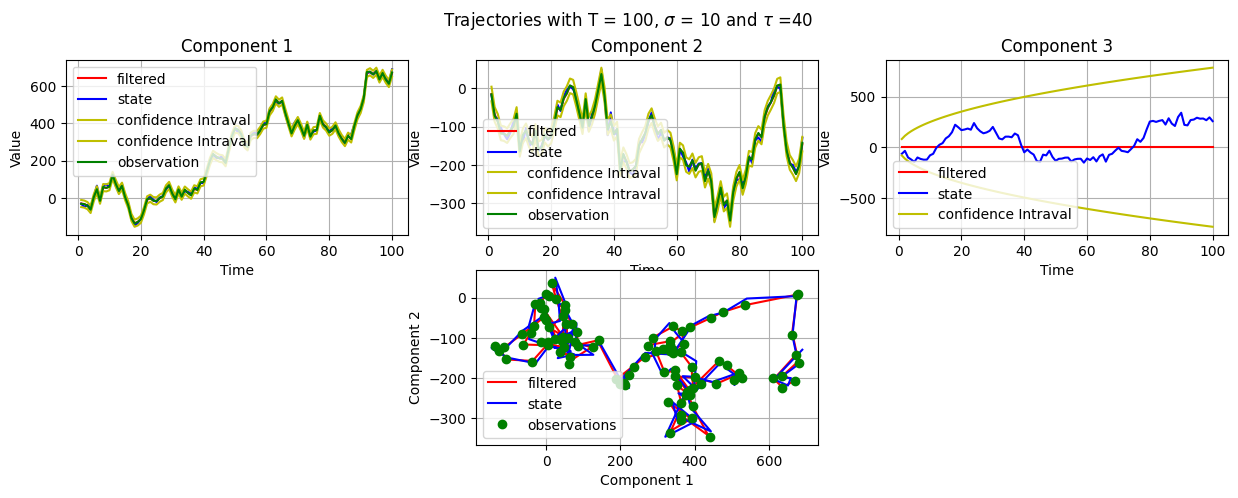

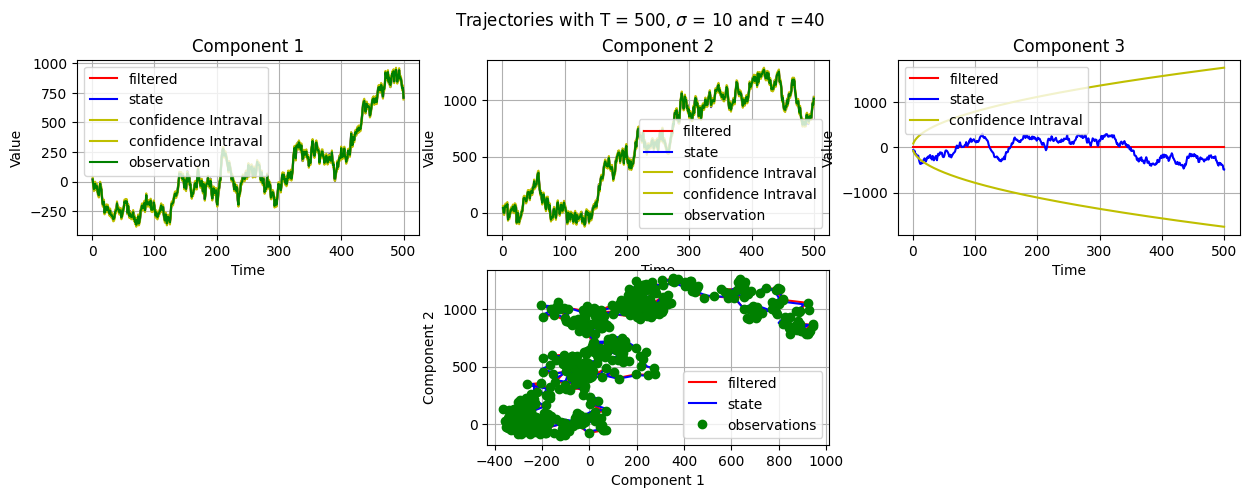

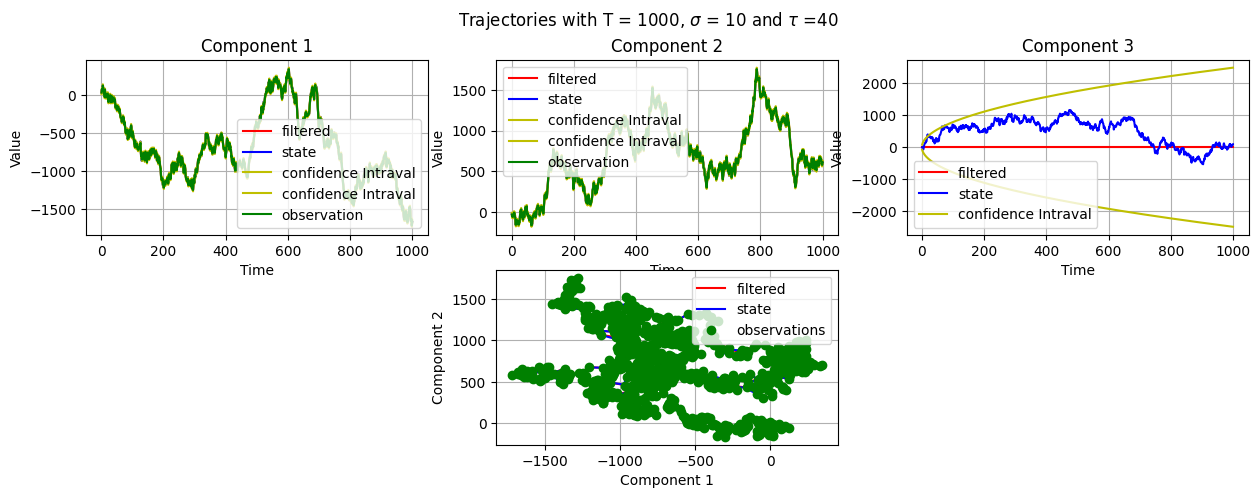

In [730]:
# Plotting 100, 500 and 1000 random variables
plot_trajectory(T=100)
plot_trajectory(T=500)
plot_trajectory(T=1000)

AS we can see, changing the value of T only increases the lenght of the trajectories. Let us now modify $\tau$, the variance of the white noise $\epsilon$.

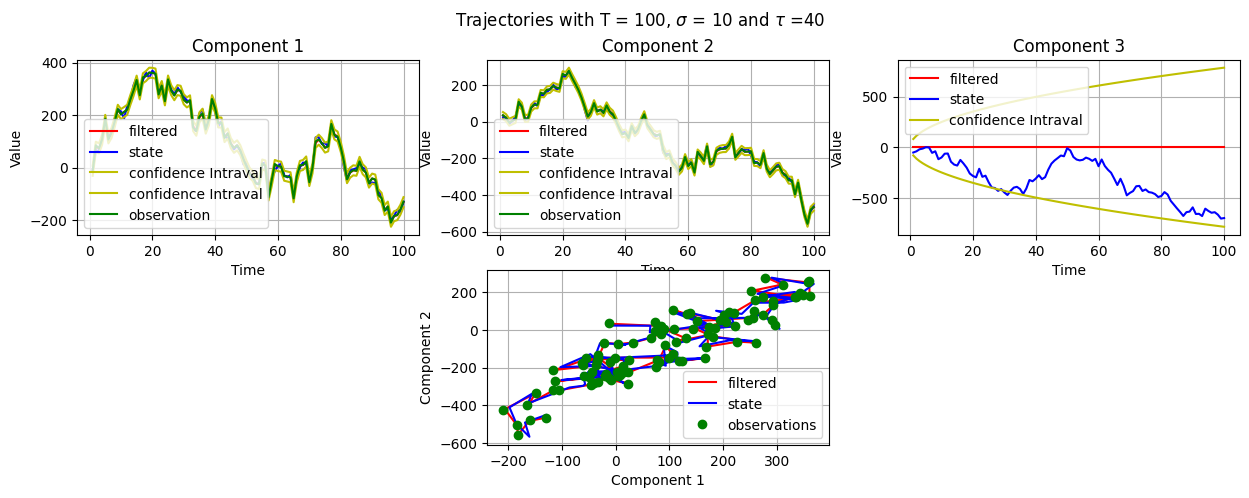

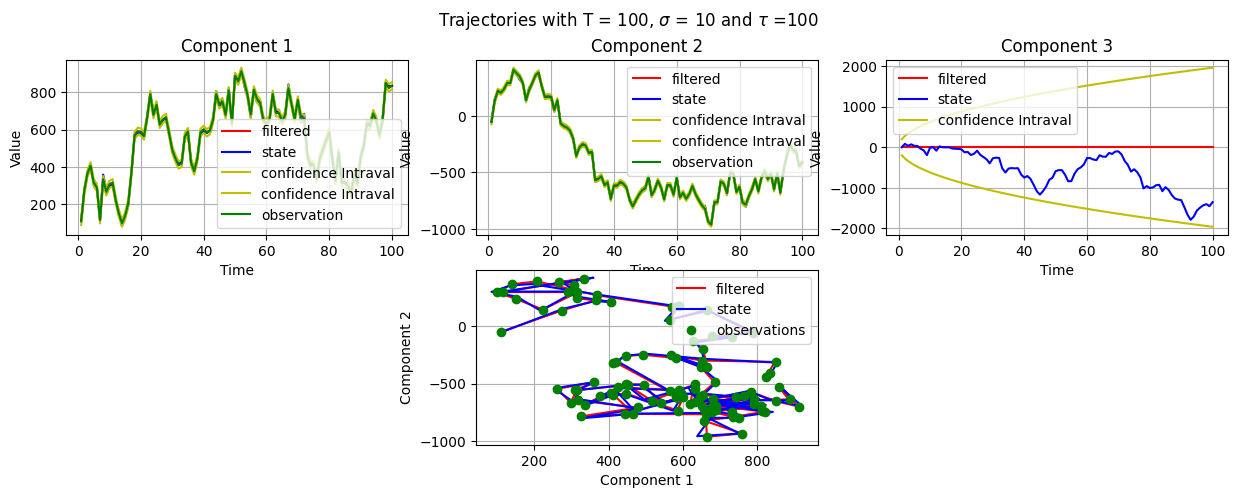

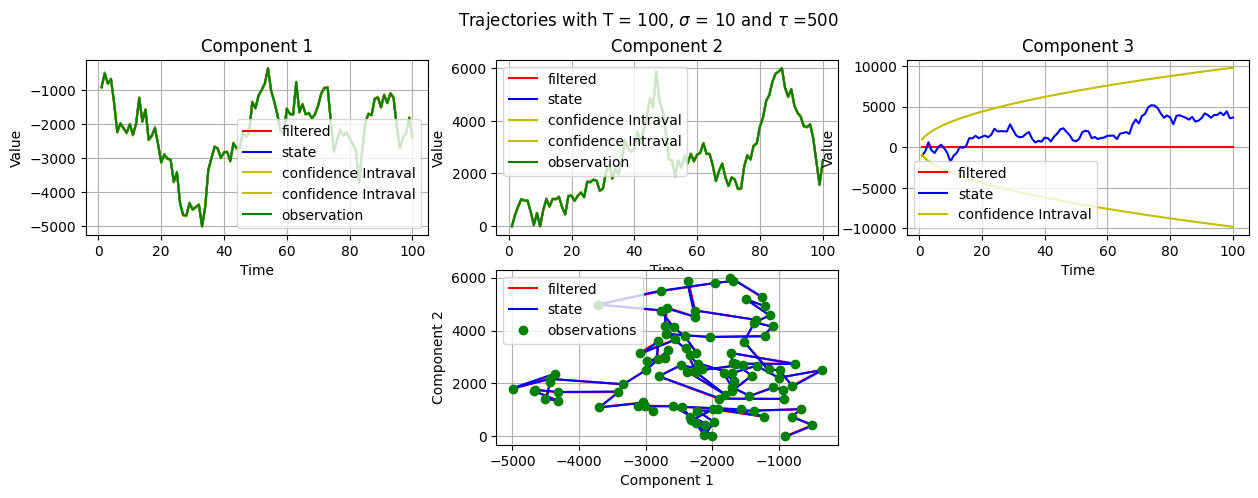

In [731]:
# Let us plot 100 random variables with tau varying and sigma constant
plot_trajectory(T=100,tau=40)
plot_trajectory(T=100,tau=100)
plot_trajectory(T=100,tau=500)

Modifying the value of $\tau$ just increases the value of the components. 

Now, let us change the value of $\sigma$, the variance of the white noise $\eta$.

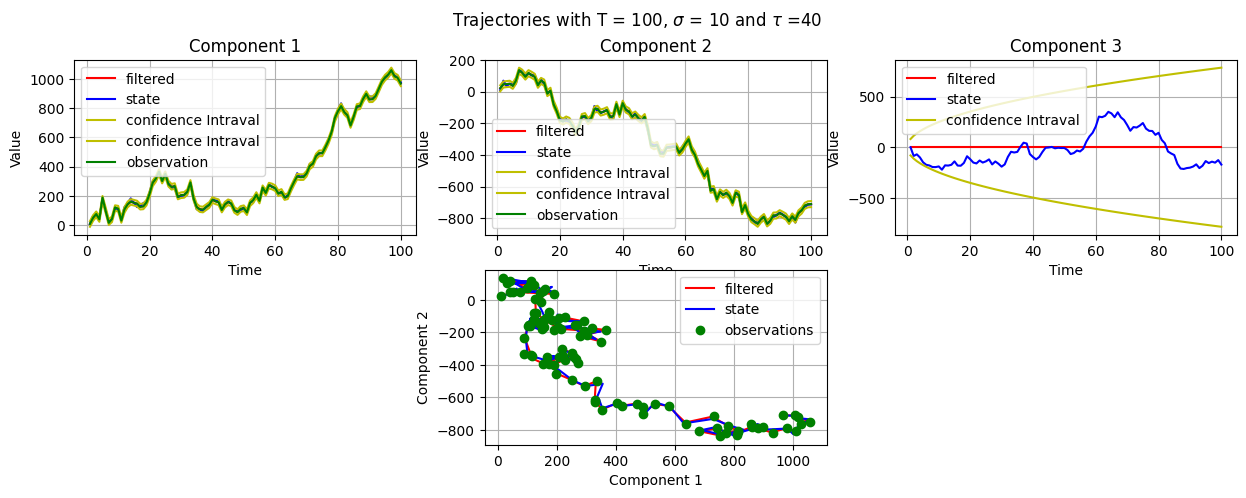

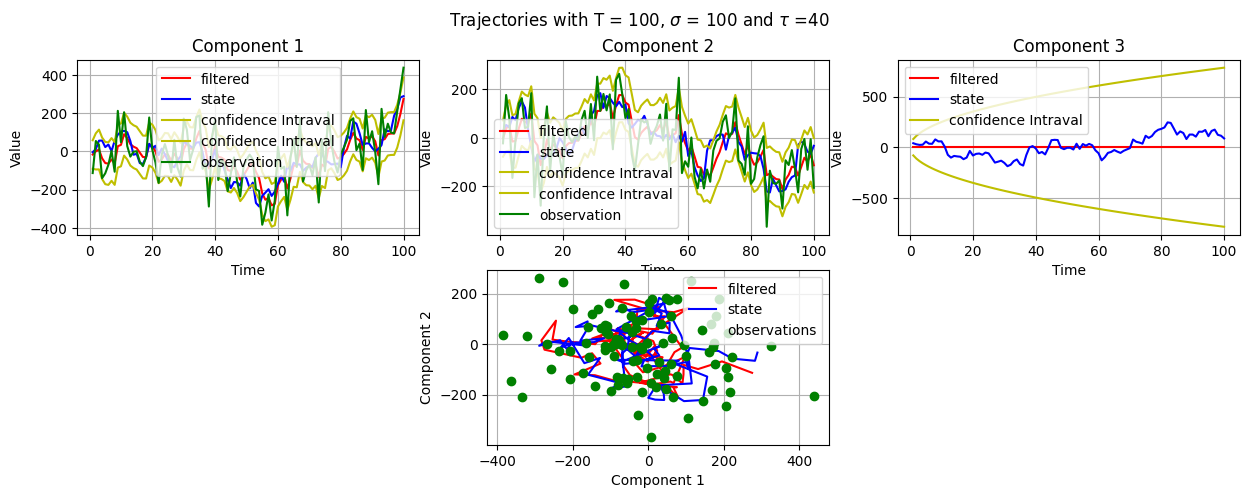

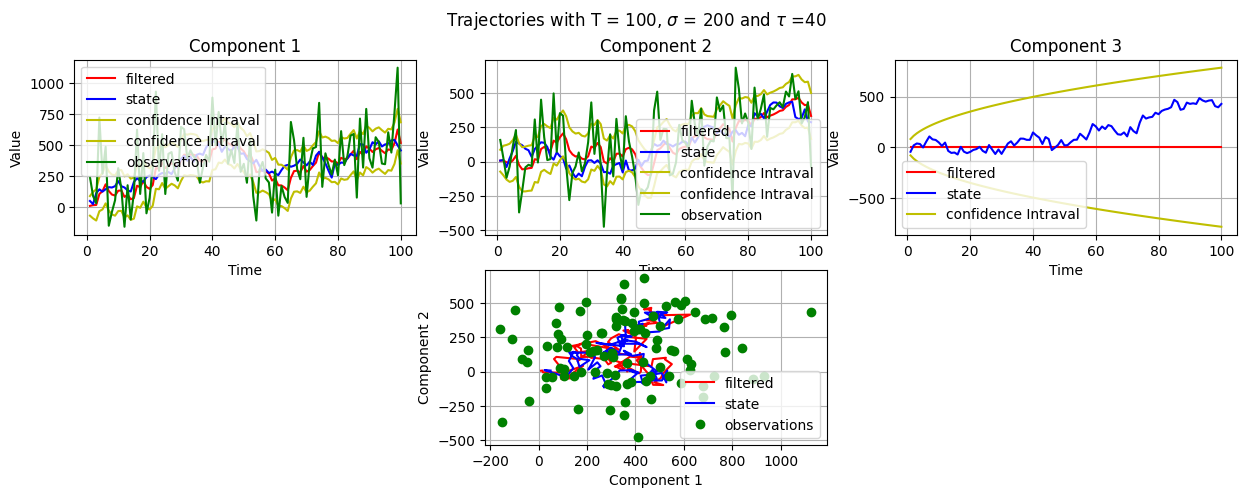

In [732]:
# Let us plot 100 random variables with sigma varying
plot_trajectory(T=100,sigma=10)
plot_trajectory(T=100,sigma=100)
plot_trajectory(T=100,sigma=200)

Varying the values of $\sigma$ varies the varaince of the white noise $\eta$, thus the variance of the observation $Y$. The trajectory $Y$  follows $X$, but it varies greatly with the increase of $\sigma$.

The Filtereed state $X_{t|t}$, the state $X_{t}$ with regard to all the previous states, also varies more around $X$. The confidence interval also increases in width, making it clear that the values have bigger variance. 

# 3 - Modification of the observation

The observation problem is modified as follows: instead of observing the 'projection' of the random walk onto the plane $(O, x1, x2)$, we observe its projection onto a plane that has undergone two successive rotations of angles $\varphi_B$ and $\vartheta_B$ around the axes $(Oy)$ and $(Ox)$. This modification corresponds to a new observation matrix $\Psi$ defined as follows (with arbitrary values of $\varphi_B$ and $\vartheta_B$) 

In [733]:
# # Define rotation angles
azi_Psi = np.pi / 3
elev_Psi = np.pi / 3
# Define rotation matrices
Rx = np.array([[1, 0, 0],
               [0, np.cos(azi_Psi), -np.sin(azi_Psi)],
               [0, np.sin(azi_Psi), np.cos(azi_Psi)]])
Ry = np.array([[np.cos(elev_Psi), 0, -np.sin(elev_Psi)],
               [0, 1, 0],
               [np.sin(elev_Psi), 0, np.cos(elev_Psi)]])

Psi = Psi @ Rx @ Ry

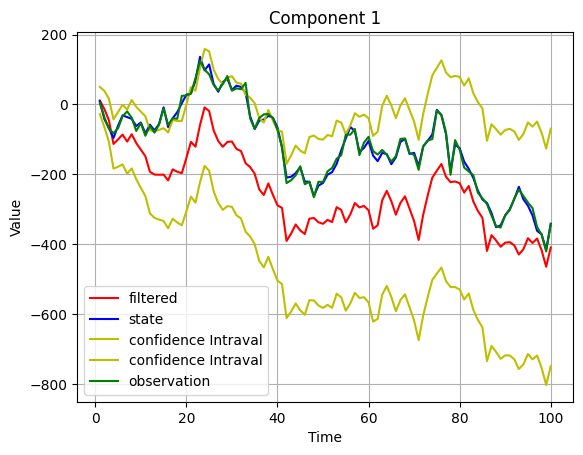

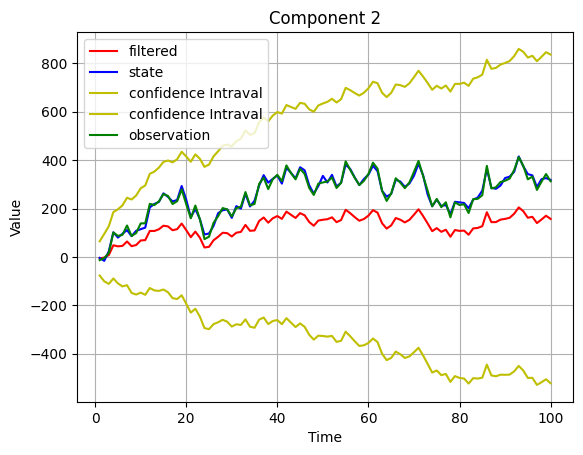

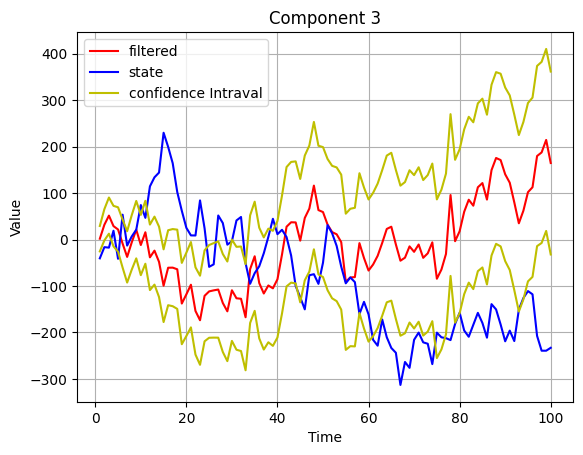

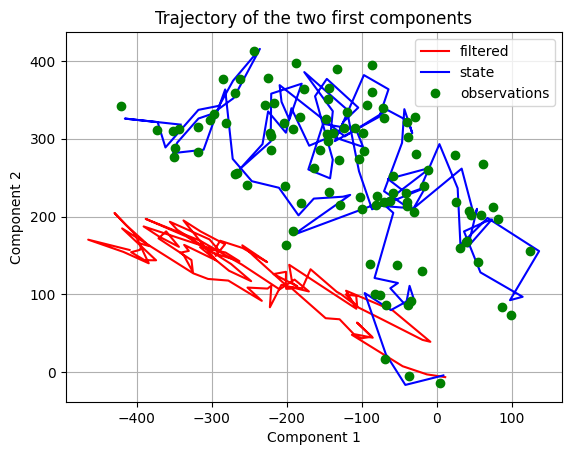

In [734]:
# Priors sur l'etat initial
m_0 = np.array([0, 0, 0])
tau = 40
sigma = 10
P_0 = 100 * np.eye(3)
Q = tau**2 * np.eye(3) 
R = sigma**2 * np.eye(2)

# Filtrage But this time we will change the values of tau, Sigma and Y
M, Parray = kalman_filter(Y, m_0, P_0, Phi, Psi, Q, R)

# Visualisation
plt.close('all')
for i in range(3):
    plt.figure(i+1)
    plt.plot(range(1, T+1), M[:, i], 'r', label='filtered')
    plt.plot(range(1, T+1), X[:, i], 'b', label='state')
    sd = np.sqrt(Parray[i, i, :])
    plt.plot(range(1, T+1), M[:, i] + 1.96 * sd, 'y')
    plt.plot(range(1, T+1), M[:, i] - 1.96 * sd, 'y')
    if i < 2:
        plt.plot(range(1, T+1), Y[:, i], 'g')
        plt.legend(['filtered', 'state','confidence Intraval','confidence Intraval', 'observation'])
    else:
        plt.legend(['filtered', 'state', 'confidence Intraval'])
    plt.title(f'Component {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

plt.figure(4)
plt.plot(M[:, 0], M[:, 1], 'r', label='filtered')
plt.plot(X[:, 0], X[:, 1], 'b', label='state')
plt.plot(Y[:, 0], Y[:, 1], 'og', label='observations')
plt.title('Trajectory of the two first components')
plt.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

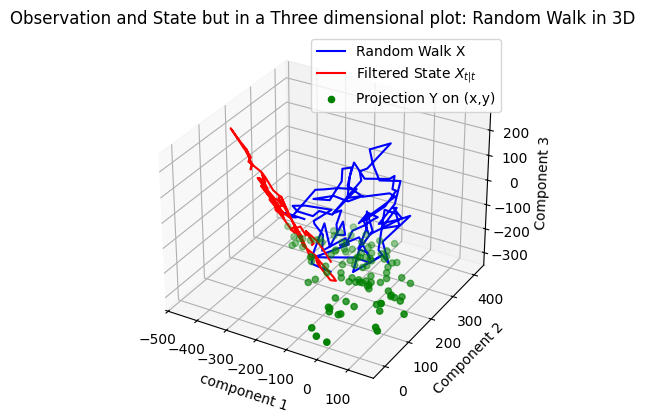

In [735]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# PLotting the satate, the filtered state and the observation
ax.plot3D(X[:, 0], X[:, 1], X[:, 2], color='blue',label='Random Walk X')
ax.plot3D(M[:,0],M[:,1],M[:, 2],color='red',label='Filtered State $X_{t|t}$')
ax.scatter(Y[:,0],Y[:,1],np.min(X[:, 2]),color='green',label='Projection Y on (x,y)')
ax.set_xlabel("component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plt.legend()
plt.title("Observation and State but in a Three dimensional plot: Random Walk in 3D")
plt.show()

Questions:
3. Explain briefly what is the difference with the previous observation matrix. (you can use for instance the filtering results of the different component to explain what you observe)